In [2]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("text")

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

The following code cell uses the quantum_info package to create the two-qubit Pauli operator Z on qubit 1 and Z on qubit 2. If the state is entangled, then the correlation between qubit 1 and qubit 2 is one.

In [3]:
from qiskit.quantum_info import Pauli
 
ZZ = Pauli('ZZ')
#Este operador representa la compuerta cuántica Z aplicada a ambos qubits, 
# lo que significa que realiza una rotación de π alrededor del eje Z en ambos qubits.
ZI = Pauli('ZI')
#ZI: Este operador representa la compuerta cuántica Z aplicada al primer qubit
# y la identidad (sin operación) en el segundo qubit.
IZ = Pauli('IZ')
#IZ: Este operador representa la compuerta cuántica Z aplicada al segundo qubit 
# y la identidad en el primer qubit.
XX = Pauli('XX')
#compuerta X a ambos qbits
XI = Pauli('XI')
#compuerta x solo al primer qbit
IX = Pauli('IX')
#compuerta x solo al segundo qbit

In [2]:
import qiskit.tools.jupyter
import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
%qiskit_version_table

C:\Users\adiezandino\AppData\Local\Temp\ipykernel_25492\2592515329.py:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import Shor


ImportError: cannot import name 'Shor' from 'qiskit.algorithms' (c:\Users\adiezandino\OneDrive - IKERLAN S.COOP\Documentación para TFG\Qiskit - inicio\qiskit\Lib\site-packages\qiskit\algorithms\__init__.py)

: 

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account.
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="fd7358cdc877ebaf1fbec2fe1d431189c1e6d0e1ef005c8ca5cd8969e1428bf8fdf01e7ea6aa4823d81fcf8a9c1aed3285a07ab71e70494a44815b0ae7ad73d7")
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=True, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create a Sampler object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to the sampler
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([ 1.27795527e-02, -1.31789137e-02, -1.95686901e-02, -7.98722045e-04,
        1.00000000e+00,  1.00000000e+00]), metadata=[{'variance': 0.9998366830323878, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9998263162326858, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9996170663679327, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.9999993620430953, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])

Entiendo que el resultado ha sido el resultado de comparar el primer qbit y el segundo qbit (el primero en superposición y el segundo entrelazado cuanticamente con el primero a traves de compuerta CNot), 6 ejecuciones cada uno con diferentes giros en planos debido a Pauli, se hacen 5000 mediciones de cada circuito.

Se puede ver como al girar un qbit en un eje da cercano a 0 puesto que se vuelven perpendiculares, en cambio cuando a ambos los giras se mantienen puesto que estan entrelazados.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

El error es debido a que las mediciones cuánticas no son exactas y tienen cierto error.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


Prueba para demonstrar la inecualidad CHSH - Qiskit

Importar librerias


In [8]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

Conectarse al Runtime de IBM

In [10]:
# Add your token below
service = QiskitRuntimeService(channel="ibm_quantum")
# Select the system with the fewest number of jobs in the queue
backend = service.least_busy(simulator=True, operational=True)

# Initialize your session
session = Session(backend=backend)
backend.name

'ibmq_qasm_simulator'

Crear el circuito CHSH, hadamard a un qubit, entrelazarlo mediante CX y una rotación con angulo theta en el eje Y.

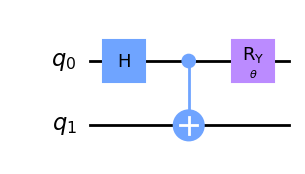

In [11]:
theta = Parameter("$\\theta$")

chsh_circuit_no_meas = QuantumCircuit(2)
chsh_circuit_no_meas.h(0)
chsh_circuit_no_meas.cx(0, 1)
chsh_circuit_no_meas.ry(theta, 0)
chsh_circuit_no_meas.draw("mpl")

Crear la lista de fases, angulos.

In [12]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

Declarar los observables, en nuestro caso vamos a comprobar dos bases, formadas por el eje X y Z para comprobar CHSH.

In [13]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])
ZX = SparsePauliOp.from_list([("ZX", 1)])
XZ = SparsePauliOp.from_list([("XZ", 1)])
XX = SparsePauliOp.from_list([("XX", 1)])

ops = [ZZ, ZX, XZ, XX]
num_ops = len(ops)

Mandar al ordenador cuantico el circuito tantas veces como angulos y operaciones haya.

In [14]:
batch_circuits = [chsh_circuit_no_meas] * number_of_phases * num_ops
batch_ops = [op for op in ops for _ in individual_phases]

Resultados

In [15]:
estimator = Estimator(session=session)

batch_expvals = (
    estimator.run(
        batch_circuits, batch_ops, parameter_values=individual_phases * num_ops, shots=int(1e4)
    )
    .result()
    .values
)

In [16]:
ZZ_expval, ZX_expval, XZ_expval, XX_expval = [
    batch_expvals[kk * number_of_phases : (kk + 1) * number_of_phases] for kk in range(num_ops)
]

In [17]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab>
chsh1_est = ZZ_expval - ZX_expval + XZ_expval + XX_expval

# <CHSH2> = <AB> + <Ab> - <aB> + <ab>
chsh2_est = ZZ_expval + ZX_expval - XZ_expval + XX_expval

Plotearla

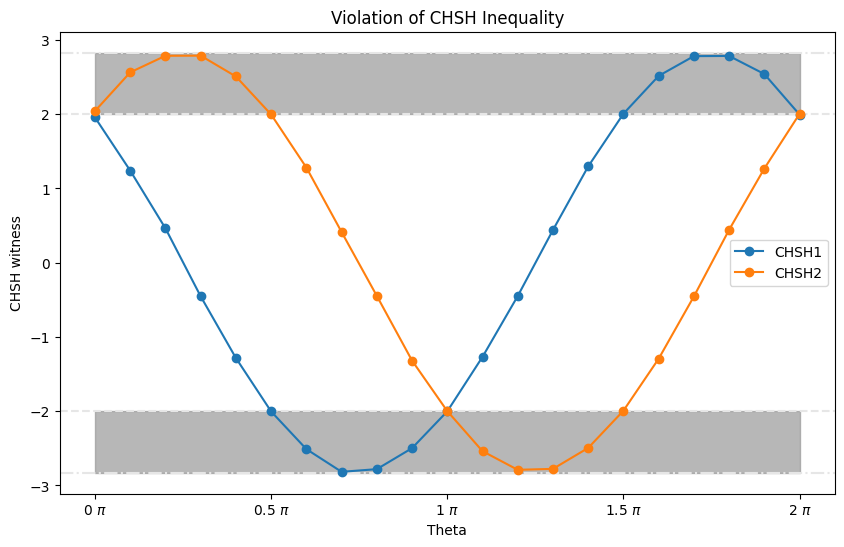

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
# results from hardware
ax.plot(phases / np.pi, chsh1_est, "o-", label="CHSH1", zorder=3)
ax.plot(phases / np.pi, chsh2_est, "o-", label="CHSH2", zorder=3)
# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title(f"Violation of CHSH Inequality")
plt.xlabel("Theta")
plt.ylabel("CHSH witness")
plt.legend()

¿Que hemos logrado?

Hemos comprobado que la mecanica cuantica no funciona con varbiables ocultas debido al entrelazamiento rompiendo la inecualidad CHSH.

La idea detrás de la desigualdad CHSH es establecer una relación entre las mediciones de partículas entrelazadas en diferentes configuraciones de observación. En el experimento, se crean dos partículas entrelazadas y se realizan mediciones en cada una de ellas en dos bases diferentes, que se etiquetan como A, a, B y b. Cada una de estas observaciones puede arrojar un valor de +1 o -1.

La desigualdad CHSH se define a través de dos cantidades, S1 y S2, como se describe en tu pregunta:

S1 = A(B - b) + a(B + b)
S2 = A(B + b) - a(B - b)

Donde:

A, a, B y b son los resultados de las mediciones en las bases A, a, B y b, respectivamente.
La desigualdad CHSH establece que la magnitud del valor esperado de S1 y S2, denotado como ⟨S1⟩ y ⟨S2⟩, debe ser menor o igual a 2:

|⟨S1⟩| ≤ 2
|⟨S2⟩| ≤ 2

Para comprender la no localidad cuántica, es importante notar que, en la mecánica cuántica, las partículas entrelazadas pueden estar correlacionadas de una manera que no puede ser explicada por la teoría de variables ocultas locales. Esto se debe a que en la mecánica cuántica, las partículas pueden estar en un estado de superposición de múltiples propiedades y, cuando se mide una de ellas, la propiedad de la otra partícula se colapsa instantáneamente en un estado correlacionado. Esto va más allá de lo que se puede explicar en una teoría local de variables ocultas, donde las propiedades ya están definidas de antemano y no pueden cambiar instantáneamente debido a la medición en la otra partícula. Por lo tanto, la no localidad cuántica se verifica mediante la observación de correlaciones cuánticas que violan la expectativa de teorías locales de variables ocultas.

Preparación del estado entrelazado:
Comencemos con un par de qubits entrelazados en el estado de Bell |Φ⁺⟩:

|Φ⁺⟩ = (|00⟩ + |11⟩) / √2

Esto significa que las dos partículas están en un estado cuántico entrelazado en el que, si medimos una partícula en un estado específico, sabremos instantáneamente el estado de la otra partícula.

Elección de Bases de Medición:
Elegimos dos bases de medición para cada qubit. Por ejemplo, usaremos las bases Z (vertical) y X (horizontal) para ambas partículas.

Medición de las Correlaciones:
Realizamos mediciones en cada qubit en las bases seleccionadas. Por ejemplo, si medimos el primer qubit en la base Z y obtenemos +1, y medimos el segundo qubit en la base X y obtenemos -1, registramos estos resultados.

Cálculo de los Valores Esperados:
Usamos los resultados de las mediciones para calcular los valores esperados de los observables que representan las correlaciones entre las partículas. En este caso, calcularemos los valores esperados de los observables ZX, XZ, XX y ZZ, que representan las correlaciones entre los qubits en las bases seleccionadas.

Verificación de la Desigualdad CHSH:
Utilizamos la desigualdad CHSH, que se ve así:

|⟨ZX⟩ + ⟨XZ⟩ + ⟨XX⟩ - ⟨ZZ⟩| ≤ 2

Si los valores esperados de los observables cumplen con esta desigualdad, entonces se dice que los resultados son consistentes con teorías locales de variables ocultas, lo que significa que las partículas están correlacionadas de una manera que puede explicarse mediante teorías locales de variables ocultas.

Violación de la Desigualdad CHSH:
Sin embargo, en experimentos cuánticos, se ha demostrado que la desigualdad CHSH se viola. Esto significa que los resultados de las mediciones muestran correlaciones que no pueden ser explicadas mediante teorías locales de variables ocultas. Las partículas están correlacionadas de una manera que desafía la noción de localidad en la física clásica.

En cambio al graficarlo podemos ver que llega al valor de 3 y -3.

Variational quantum Eigensolver